In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.power as smp
import scipy.stats
from scipy.stats import t, norm, ttest_ind, ttest_rel, ttest_1samp
import decimal
import random
#decimal.getcontext().prec = 4
%matplotlib inline

In [2]:
def get_normal_sample(n,mean,sd):
    return np.random.normal(loc=mean,scale=sd,size=n)

In [27]:
def conf_int_one_sample(x,alfa,alternative = 'two-tailed',diff=0):
    '''
    alternative == 'two-tailed','left','right'
    '''
    mean = np.mean(x)
    se = np.std(x,ddof=1)/np.sqrt(len(x))
    if alternative == 'two-tailed':
        return mean - diff - t.ppf(1-alfa/2,df=len(x)-1)*se,mean + diff + t.ppf(1-alfa/2,df=len(x)-1)*se
    elif alternative == 'left':
        return mean + diff - t.ppf(1-alfa,df=len(x)-1)*se
    elif alternative == 'right':
        return mean + diff + t.ppf(1-alfa,df=len(x)-1)*se
    else:
        print('wrong value')

In [4]:
def t_test_for_one_group(x,pop_mean,diff=0,alternative='two-tailed'):
    n = len(x)
    sd = np.std(x,ddof=1)
    se = sd/np.sqrt(n)
    if diff == 0:
        ts = (np.mean(x) - pop_mean)/se
    else:
        ts = (np.mean(x) - pop_mean - diff)/se
    df = n-1
    if alternative == "two-tailed":
        p_val = t.sf(np.abs(ts),df)*2
        #p_val = 2 * t.cdf(-abs(ts), df)
    elif alternative == "lesser":
        p_val = t.cdf(ts, df)
    elif alternative == "greater":
        p_val = 1-t.cdf(ts, df)
    return p_val

In [5]:
def one_sample_conf_comparison(pop_mean,smpl_mean,diff): # patrzy na przedział ufności 
    podsumowanie = []
   
    for j in range(100):
        samples_downs = []
        sample = get_normal_sample(40,smpl_mean,4)
        for k in range(1,501):
            k =k*0.001
            down = conf_int_one_sample(sample,k,'left')
            samples_downs.append(down)

        g1 = np.array(samples_downs) - pop_mean
        sample_mean = smpl_mean - pop_mean
        cent_diff = diff - pop_mean
        
        diff_01 = len([i for i in g1 if i>0 and sample_mean>0])
        diff_non_01 = len([i for i in g1 if i>cent_diff and sample_mean>cent_diff])

        diff_02 = len([i for i in g1 if i<=0 and sample_mean<=0])
        diff_non_02 = len([i for i in g1 if i<=cent_diff and sample_mean<=cent_diff])

        diff_03 = len([i for i in g1 if i<=0 and sample_mean>0])
        diff_non_03 = len([i for i in g1 if i<=cent_diff and sample_mean>cent_diff])

        diff_04 = len([i for i in g1 if i>0 and sample_mean<=0])
        diff_non_04 = len([i for i in g1 if i>cent_diff and sample_mean<=cent_diff])

        podsumowanie.append([diff_01,diff_non_01,diff_02,diff_non_02,diff_03,diff_non_03,diff_04,diff_non_04])

    ile_wszystkich = sum([sum(i) for i in podsumowanie])/2

    for i in range(len(podsumowanie)):
        pop_dobrze = sum([i[0] for i in podsumowanie])
        nwd_dobrze = sum([i[2] for i in podsumowanie])
        nwd_zle = sum([i[4] for i in podsumowanie])
        pop_zle = sum([i[6] for i in podsumowanie])
        alt_pop_dobrze = sum([i[1] for i in podsumowanie])
        alt_nwd_dobrze = sum([i[3] for i in podsumowanie])
        alt_nwd_zle = sum([i[5] for i in podsumowanie])
        alt_pop_zle = sum([i[7] for i in podsumowanie])

    print('test, ocena testu')

    print('pozytywny, dobrze', '\n' , 'dla klasycznego: ', pop_dobrze,'\n', 'dla alternatywnego: ', alt_pop_dobrze,' ')

    print('\n','pozytywny, źle', '\n' , 'dla klasycznego: ', pop_zle,'\n', 'dla alternatywnego: ', alt_pop_zle)

    print('\n','nie wiadomo, dobrze', '\n' , 'dla klasycznego: ', nwd_dobrze,'\n', 'dla alternatywnego: ', alt_nwd_dobrze)

    print('\n','nie wiadomo, źle', '\n' , 'dla klasycznego: ', nwd_zle,'\n', 'dla alternatywnego: ', alt_nwd_zle)

    print('\n','poprawnie', '\n' , 'dla klasycznego: ', (pop_dobrze+nwd_dobrze)/ile_wszystkich ,'\n', 'dla alternatywnego: ', (alt_pop_dobrze+alt_nwd_dobrze)/ile_wszystkich)

    #return (pop_dobrze+nwd_dobrze)/ile_wszystkich, (alt_pop_dobrze+alt_nwd_dobrze)/ile_wszystkich


In [6]:
def one_sample_ttest_comparison(sample_mean,pop_mean,diff,alfa):
    #p_p   = 0  #test_rzeczywistość
    #m_m   = 0
    #p_m   = 0
    #m_p   = 0
    #a_p_p = 0
    #a_m_m = 0
    #a_p_m = 0
    #a_m_p = 0
    for i in range(100):
        sample = get_normal_sample(40,sample_mean,4)
        
        stand = t_test_for_one_group(sample,pop_mean,alternative='greater')
        alt = t_test_for_one_group(sample,pop_mean,diff,'greater')
        if sample_mean > pop_mean:
            if stand < alfa:
                p_p+=1
            else:
                m_p +=1
            if alt < alfa:
                a_p_p+=1
            else:
                a_m_p +=1
        else:
            if stand < alfa:
                m_m+=1
            else:
                p_m +=1
            if alt < alfa:
                a_m_m+=1
            else:
                a_p_m +=1
        #p_values.append([stand,alt])
        #p_values.append([t_test_for_one_group(sample,pop_mean,'greater'),t_test_for_one_group(sample,pop_mean,diff,'greater')])
    #return p_p, m_m, p_m, m_p, a_p_p, a_m_m, a_p_m, a_m_p

In [7]:
samplemean = [11,13,15,11,14]
popmean = [10,10,10,10,12]
diff_list = [12,12,12,12,16]
for k in range(5):
    p_p   = 0
    m_m   = 0
    p_m   = 0
    m_p   = 0
    a_p_p = 0
    a_m_m = 0
    a_p_m = 0
    a_m_p = 0
    sample_mean = samplemean[k] 
    pop_mean = popmean[k]
    diff = diff_list[k]
    for alfa in range(1,101):
        alfa = alfa*0.01
        for i in range(1,101):
            sample = get_normal_sample(40,sample_mean,4)
            stand = t_test_for_one_group(sample,pop_mean,diff=0,alternative='greater')
            alt = t_test_for_one_group(sample,pop_mean,diff,'greater')
            if sample_mean > pop_mean:
                if stand < alfa:
                    p_p+=1
                elif stand >= alfa:
                    m_p +=1
            else:
                if stand < alfa:
                    m_m+=1
                else:
                    p_m +=1

            if sample_mean > diff:
                if alt < alfa:
                    a_p_p+=1
                elif alt >= alfa:
                    a_m_p +=1
            else:
                if alt < alfa:
                    a_m_m+=1
                else:
                    a_p_m +=1

    print('test, rzeczywistość','\n',
          'p_p ', p_p, '\n',  
          'm_m ',m_m,  '\n',  
          'a_p_p ',a_p_p,'\n',
          'a_m_m ',a_m_m,'\n',    
          'p_m ',p_m,  '\n',  
          'm_p ',m_p,  '\n',  
          'a_p_m ',a_p_m,'\n',
          'a_m_p ',a_m_p,'\n',
          'correct: ', (p_p+m_m)/(p_p+m_m+p_m+m_p),'\n',
          'correct alt: ', (a_p_p+a_m_m)/(a_p_p+a_m_m+a_p_m+a_m_p))

test, rzeczywistość 
 p_p  8717 
 m_m  0 
 a_p_p  0 
 a_m_m  4 
 p_m  0 
 m_p  1283 
 a_p_m  9996 
 a_m_p  0 
 correct:  0.8717 
 correct alt:  0.0004
test, rzeczywistość 
 p_p  9998 
 m_m  0 
 a_p_p  44 
 a_m_m  0 
 p_m  0 
 m_p  2 
 a_p_m  0 
 a_m_p  9956 
 correct:  0.9998 
 correct alt:  0.0044
test, rzeczywistość 
 p_p  10000 
 m_m  0 
 a_p_p  91 
 a_m_m  0 
 p_m  0 
 m_p  0 
 a_p_m  0 
 a_m_p  9909 
 correct:  1.0 
 correct alt:  0.0091
test, rzeczywistość 
 p_p  8700 
 m_m  0 
 a_p_p  0 
 a_m_m  2 
 p_m  0 
 m_p  1300 
 a_p_m  9998 
 a_m_p  0 
 correct:  0.87 
 correct alt:  0.0002
test, rzeczywistość 
 p_p  9880 
 m_m  0 
 a_p_p  0 
 a_m_m  0 
 p_m  0 
 m_p  120 
 a_p_m  10000 
 a_m_p  0 
 correct:  0.988 
 correct alt:  0.0


In [8]:
def podejscie1(pop_mean,sample_size,sample_mean,diff=0):
    sample = get_normal_sample(sample_size,sample_mean,4)
    mean = np.mean(sample)
    if mean > pop_mean+diff and sample_mean > pop_mean+diff:
        return 'p-cor'
    elif mean > pop_mean+diff and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif mean <= pop_mean+diff and sample_mean <= pop_mean+diff:
        return 'n-cor'
    elif mean <= pop_mean+diff and sample_mean > pop_mean+diff:
        return '2t-er'
results = []
#for j in range(10):
for i in range(1000):
        results.append(podejscie1(10,30,15,7))
print('p-cor: ',(results.count('p-cor')/len(results))*100)
print('n-cor: ',(results.count('n-cor')/len(results))*100)
print('1t-er: ',(results.count('1t-er')/len(results))*100)
print('2t-er: ',(results.count('2t-er')/len(results))*100)

p-cor:  0.0
n-cor:  99.7
1t-er:  0.3
2t-er:  0.0


In [9]:
def podejscie2(pop_mean,sample_size,sample_mean,alfa,diff=0):
    sample = get_normal_sample(sample_size,sample_mean,4)
    result = t_test_for_one_group(sample,pop_mean,alternative='greater')
    
    if result < alfa and sample_mean > pop_mean+diff:
        return 'p-cor'
    elif result < alfa and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif result >= alfa and sample_mean <= pop_mean+diff:
        return 'n-cor'
    elif result > alfa and sample_mean > pop_mean+diff:
        return '2t-er'
results = []
#for j in range(10):
for i in range(1000):
    results.append(podejscie2(10,30,15,0.05,7))
print('p-cor: ',(results.count('p-cor')/len(results))*100)
print('n-cor: ',(results.count('n-cor')/len(results))*100)
print('1t-er: ',(results.count('1t-er')/len(results))*100)
print('2t-er: ',(results.count('2t-er')/len(results))*100)

p-cor:  0.0
n-cor:  0.0
1t-er:  100.0
2t-er:  0.0


In [10]:
def podejscie3(pop_mean,sample_size,sample_mean,alfa,diff=0):
    sample = get_normal_sample(sample_size,sample_mean,4)
    result = t_test_for_one_group(sample,pop_mean,diff=diff,alternative='greater')
    
    if result < alfa and sample_mean > pop_mean+diff:
        return 'p-cor'
    elif result < alfa and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif result >= alfa and sample_mean <= pop_mean+diff:
        return 'n-cor'
    elif result > alfa and sample_mean > pop_mean+diff:
        return '2t-er'
results = []
#for j in range(10):
for i in range(1000):
    results.append(podejscie3(10,30,15,0.05,7))
print('p-cor: ',(results.count('p-cor')/len(results))*100)
print('n-cor: ',(results.count('n-cor')/len(results))*100)
print('1t-er: ',(results.count('1t-er')/len(results))*100)
print('2t-er: ',(results.count('2t-er')/len(results))*100)

p-cor:  0.0
n-cor:  100.0
1t-er:  0.0
2t-er:  0.0


In [11]:
def podejście_2_power(pop_mean,sample_size,sample_mean,diff):
    results = []
    powers = []
    alfas = []
    for j in range(1000):
        alfa = j*0.001
        #for i in range(1000):
        alfas.append(alfa)
        results.append(podejscie2(0,30,5,alfa,diff=diff))
        powers.append(smp.ttest_power(effect_size = diff/2, 
                                      nobs = sample_size,
                                      alpha=alfa,
                                      alternative ='larger'))
        #powers.append(smp.TTestIndPower().solve_power(effect_size = (np.abs(pop_mean-sample_mean))/np.std(2,ddof=1), 
                                                      #nobs = sample_size,
                                                      #alpha=alfa,
                                                      #alternative ='larger'))
    #fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    #ax2.scatter(alfas,powers)
    #ax1.scatter(alfas,results)
    print(np.median(powers))

In [12]:
podejście_2_power(10,30,14,2)

0.9999999783976847


In [13]:
def podejście_3_power(pop_mean,sample_size,sample_mean,diff):
    results = []
    powers = []
    alfas = []
    for j in range(1000):
        alfa = j*0.001
        #for i in range(1000):
        alfas.append(alfa)
        results.append(podejscie3(0,30,5,alfa,diff=diff))
        powers.append(smp.ttest_power(effect_size = diff/2, 
                                      nobs = sample_size,
                                      alpha=alfa,
                                      alternative ='larger'))
        #powers.append(smp.TTestIndPower().solve_power(effect_size = (np.abs(pop_mean-sample_mean))/np.std(2,ddof=1), 
                                                      #nobs = sample_size,
                                                      #alpha=alfa,
                                                      #alternative ='larger'))
    #fig, (ax1, ax2) = plt.subplots(2, sharex=True)
    #x2.scatter(alfas,powers)
    #ax1.scatter(alfas,results)
    print(np.median(powers))

In [14]:
podejście_3_power(10,40,14,3)
podejście_2_power(10,40,14,3)

1.0
1.0


In [15]:
results = []
for j in range(1000):
    alfa = j*0.001
    #for i in range(1000):
    results.append(podejscie3(10,40,14,alfa=alfa,diff=4))
print(results.count('p-cor'))
print(results.count('n-cor'))
print(results.count('1t-er'))
print(results.count('2t-er'))


0
506
494
0


In [16]:
results = []
for j in range(1000):
    alfa = j*0.001
    #for i in range(1000):
    results.append(podejscie2(10,40,14,alfa=alfa,diff=4))
print(results.count('p-cor'))
print(results.count('n-cor'))
print(results.count('1t-er'))
print(results.count('2t-er'))


0
1
999
0


In [17]:
def pods_1(sample,pop_mean,diff=0):
    sample_size = np.size(sample)
    sample_mean = np.mean(sample)
    sample = get_normal_sample(sample_size,sample_mean,4)
    mean = np.mean(sample)
    if mean > pop_mean+diff and sample_mean > pop_mean+diff:
        return 'cor'
    elif mean > pop_mean+diff and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif mean <= pop_mean+diff and sample_mean <= pop_mean+diff:
        return 'cor'
    elif mean <= pop_mean+diff and sample_mean > pop_mean+diff:
        return '2t-er'
    
def pods_2(sample,pop_mean,alfa,diff=0):
    sample_size = np.size(sample)
    sample_mean = np.mean(sample)
    result = t_test_for_one_group(sample,pop_mean,alternative='greater')
    
    if result < alfa and sample_mean > pop_mean+diff:
        return 'cor'
    elif result < alfa and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif result >= alfa and sample_mean <= pop_mean+diff:
        return 'cor'
    elif result > alfa and sample_mean > pop_mean+diff:
        return '2t-er'

def pods_3(sample,pop_mean,alfa,diff=0):
    sample_size = np.size(sample)
    sample_mean = np.mean(sample)
    result = t_test_for_one_group(sample,pop_mean,diff=diff,alternative='greater')
    
    if result < alfa and sample_mean > pop_mean+diff:
        return 'cor'
    elif result < alfa and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif result >= alfa and sample_mean <= pop_mean+diff:
        return 'cor'
    elif result > alfa and sample_mean > pop_mean+diff:
        return '2t-er'
rslts_1 = []
rslts_2 = []
rslts_3 = []
diffs = []

for i in range(1000):
    diff = i*0.01
    lst_1 = []
    lst_2 = []
    lst_3 = []
    for j in range(100):
        sample = get_normal_sample(50,14,4)
        lst_1.append(pods_1(sample,10,diff))
        lst_2.append(pods_2(sample,10,0.01,diff))
        lst_3.append(pods_3(sample,10,0.01,diff))
    #rslts_2.append(pods_2(sample,10,0.01,diff))
    #rslts_3.append(pods_3(sample,10,0.01,diff))
    rslts_1.append(lst_1.count('cor'))
    rslts_2.append(lst_2.count('cor'))
    rslts_3.append(lst_3.count('cor'))
    diffs.append(diff)
#fig, (ax1, ax2) = plt.subplots(2, sharex=True)
#ax1.scatter(diffs,rslts_2)
#ax2.scatter(diffs,rslts_3)
#ax1.set_title('podejście_2')
#ax2.set_title('podejście_3')
#ax1.set_xlab('δ')
#ax.set_ylab('ilość testów zwracających prawidłową odpowiedź')

Text(0.5, 0, 'Ilość poprawnych odpowiedzi (maksymalnie 100) w zależności od pożądanej wielkości efektu. Populacja z której losowano próbę miała średnią 14, a porównywano do wartości 10.\nPierwszy wykres przedstawia podejście 1, drugi podejście 2,a ostatni podejście 3')

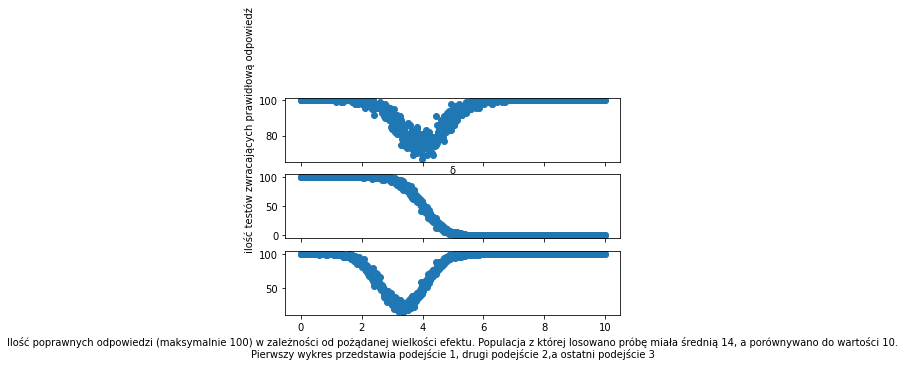

In [18]:
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)
ax1.scatter(diffs,rslts_1)
ax2.scatter(diffs,rslts_2)
ax3.scatter(diffs,rslts_3)
#ax1.set_title('podejście_2')
#ax2.set_title('podejście_3')
ax1.set_xlabel('δ')
ax1.set_ylabel('ilość testów zwracających prawidłową odpowiedź')
ax3.set_xlabel('Ilość poprawnych odpowiedzi (maksymalnie 100) w zależności od pożądanej wielkości efektu. Populacja z której losowano próbę miała średnią 14, a porównywano do wartości 10.'+'\n'+
               'Pierwszy wykres przedstawia podejście 1, drugi podejście 2,a ostatni podejście 3')

(array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 2., 0.,
        0., 0., 0., 0., 0., 1.]),
 array([0.00908787, 0.03325226, 0.05741665, 0.08158104, 0.10574542,
        0.12990981, 0.1540742 , 0.17823858, 0.20240297, 0.22656736,
        0.25073175, 0.27489613, 0.29906052, 0.32322491, 0.34738929,
        0.37155368, 0.39571807, 0.41988246, 0.44404684, 0.46821123,
        0.49237562, 0.51654001, 0.54070439, 0.56486878, 0.58903317,
        0.61319755, 0.63736194, 0.66152633, 0.68569072, 0.7098551 ,
        0.73401949, 0.75818388, 0.78234826, 0.80651265, 0.83067704,
        0.85484143, 0.87900581, 0.9031702 , 0.92733459, 0.95149897,
        0.97566336]),
 <a list of 40 Patch objects>)

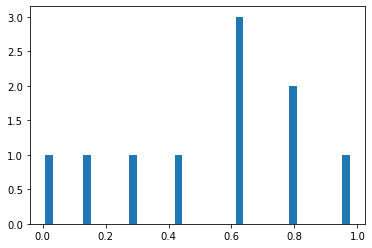

In [19]:
rslts = []
for i in range(10):
    rslts.append(ttest_1samp(get_normal_sample(50,10+i*0.001,4),popmean=10)[1])
rslts.sort(reverse=True)
plt.hist(rslts,bins=40)

In [20]:
def dejscie2(pop_mean,sample_size,sample_mean,alfa,diff=0):
    sample = get_normal_sample(sample_size,sample_mean,4)
    result = t_test_for_one_group(sample,pop_mean,alternative='greater')
    
    if result < alfa and sample_mean > pop_mean+diff:
        return 'p-cor'
    elif result < alfa and sample_mean <= pop_mean+diff:
        return '1t-er'
    elif result >= alfa and sample_mean <= pop_mean+diff:
        return 'n-cor'
    elif result > alfa and sample_mean > pop_mean+diff:
        return '2t-er'
results = []
alfa = 0.01
for i in range(1000):
    results.append(dejscie2(0,30,2,alfa,diff=0))
print(results.count('p-cor'))
print(results.count('n-cor'))
print(results.count('1t-er'))
print(results.count('2t-er'))

615
0
0
385


In [21]:
results = []
alfa = 0.01
for i in range(1000):
    results.append(podejscie3(0,30,5,alfa,diff=3))
print(results.count('p-cor'))
print(results.count('n-cor'))
print(results.count('1t-er'))
print(results.count('2t-er'))

613
0
0
387


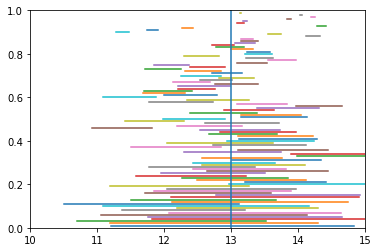

In [22]:
alfas = []
cis_0 = []
cis_1 = []
for i in range(1,100):
    x = get_normal_sample(30,13,4)
    alfa = i*0.01
    alfas.append(alfa)
    cis_0.append(conf_int_one_sample(x,alfa)[0])
    cis_1.append(conf_int_one_sample(x,alfa)[1])
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.axis([10,15,0,1])
for i in range(len(alfas)):
    ax.plot([cis_0[i],cis_1[i]],[alfas[i],alfas[i]])
ax.axvline(x=13)


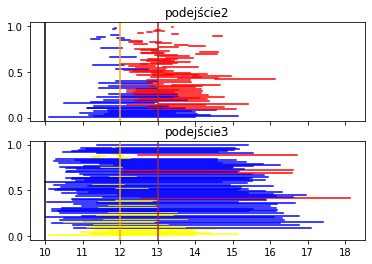

In [23]:
#a = conf_int_one_sample(x,0.1)

alfas = []
cis_0 = []
cis_1 = []
cis_0_pod3 = []
cis_1_pod3 = []

diff = 2
mean = 13
pop_mean = 10
for i in range(1,100):
    x = get_normal_sample(30,mean,4)
    alfa = i*0.01
    alfas.append(alfa)
    cis_0.append(conf_int_one_sample(x,alfa)[0])
    cis_1.append(conf_int_one_sample(x,alfa)[1])
    cis_0_pod3.append(conf_int_one_sample(x,alfa,diff=diff)[0])
    cis_1_pod3.append(conf_int_one_sample(x,alfa,diff=diff)[1])
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
#fig = plt.figure()
#ax = fig.add_subplot(1,1,1)
#ax.axis([9,16,0,1])
ax1.set_title('podejście2')
ax2.set_title('podejście3')
reds = 0
blues = 0
for i in range(len(alfas)):
    if cis_0[i] > pop_mean + diff:
        ax1.plot([cis_0[i],cis_1[i]],[alfas[i],alfas[i]],color = 'red')
    elif cis_0[i] > pop_mean and cis_0[i] < mean+diff:
        ax1.plot([cis_0[i],cis_1[i]],[alfas[i],alfas[i]],color = 'blue')
    else:
        ax1.plot([cis_0[i],cis_1[i]],[alfas[i],alfas[i]],color = 'yellow')
    if cis_0_pod3[i] > pop_mean + diff:
        ax2.plot([cis_0_pod3[i],cis_1_pod3[i]],[alfas[i],alfas[i]],color = 'red')
    elif cis_0_pod3[i] > pop_mean and cis_0[i] < mean+diff:
        ax2.plot([cis_0_pod3[i],cis_1_pod3[i]],[alfas[i],alfas[i]],color = 'blue')
    else:
        ax2.plot([cis_0[i],cis_1[i]],[alfas[i],alfas[i]],color = 'yellow')
ax1.axvline(x=pop_mean, color = 'black')
ax1.axvline(x=pop_mean+diff, color = 'orange')
ax1.axvline(x=mean, color = 'brown')
ax2.axvline(x=pop_mean, color = 'black')
ax2.axvline(x=pop_mean+diff, color = 'orange')
ax2.axvline(x=mean, color = 'brown')


Text(0, 0.5, 'wartość alfa')

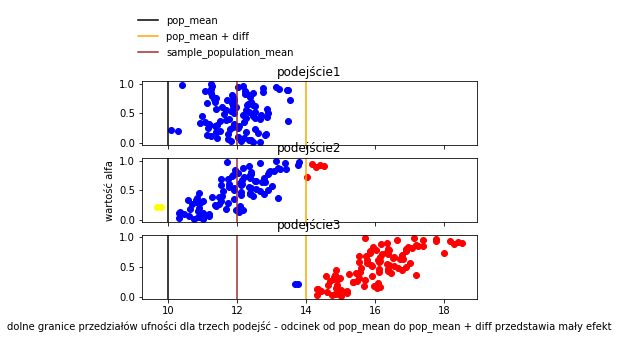

In [30]:
#a = conf_int_one_sample(x,0.1)

alfas = []
cis_0 = []
cis_0_pod3 = []
cis_0_pod1 = []

diff = 4
mean = 12
pop_mean = 10
for i in range(1,100):
    x = get_normal_sample(30,mean,4)
    alfa = i*0.01
    alfas.append(alfa)
    cis_0.append(conf_int_one_sample(x,alfa,alternative='left'))
    cis_0_pod3.append(conf_int_one_sample(x,alfa,diff=diff,alternative='left'))
    cis_0_pod1.append(np.mean(x))
fig, (ax1, ax2, ax3) = plt.subplots(3, sharex=True)

ax1.set_title('podejście1')
ax2.set_title('podejście2')
ax3.set_title('podejście3')

for i in range(len(alfas)):
    
    if cis_0[i] > pop_mean + diff:
        ax2.scatter(cis_0[i],alfas[i],color = 'red')
    elif cis_0[i] > pop_mean and cis_0[i] < pop_mean+diff:
        ax2.scatter(cis_0[i],alfas[i],color = 'blue')
    else:
        ax2.scatter(cis_0[i],alfas[i],color = 'yellow')
    
    if cis_0_pod3[i] > pop_mean + diff:
        ax3.scatter(cis_0_pod3[i],alfas[i],color = 'red')
    elif cis_0_pod3[i] > pop_mean and cis_0_pod3[i] < pop_mean+diff:
        ax3.scatter(cis_0_pod3[i],alfas[i],color = 'blue')
    else:
        ax3.scatter(cis_0_pod3[i],alfas[i],color = 'yellow')
    
    if cis_0_pod1[i] > pop_mean + diff:
        ax1.scatter(cis_0_pod1[i],alfas[i],color = 'red')
    elif cis_0_pod1[i] > pop_mean and cis_0_pod1[i] < pop_mean+diff:
        ax1.scatter(cis_0_pod1[i],alfas[i],color = 'blue')
    else:
        ax1.scatter(cis_0_pod1[i],alfas[i],color = 'yellow')

ax1.axvline(x=pop_mean, color = 'black', label = 'pop_mean')
ax1.axvline(x=pop_mean+diff, color = 'orange', label = 'pop_mean + diff')
ax1.axvline(x=mean, color = 'brown', label = 'sample_population_mean')
fig.legend(frameon=False, loc = 'center', bbox_to_anchor = (0.5,1.05))
ax2.axvline(x=pop_mean, color = 'black')
ax2.axvline(x=pop_mean+diff, color = 'orange')
ax2.axvline(x=mean, color = 'brown')
ax3.axvline(x=pop_mean, color = 'black')
ax3.axvline(x=pop_mean+diff, color = 'orange')
ax3.axvline(x=mean, color = 'brown')
ax3.set_xlabel('dolne granice przedziałów ufności dla trzech podejść - odcinek od pop_mean do pop_mean + diff przedstawia mały efekt')
ax2.set_ylabel('wartość alfa')

In [44]:
import random
def variation(array,n):
    vals = [random.choice(array) for i in range(n)]
    return vals
delta = 4
sd = 4
dane = []
mean_pop = 0
alfa= 0.05
mi = 2
result1 = []
result2 = []
result3 = []
ile = 0
#for i in range(0,20):
#    mi = delta + i*0.01
#    for k in range(-20,21):
#        sd = 3 + k*0.01
#        n = 40 + int(random.randint(0,10)*4)
#        popp = get_normal_sample(10000,mi,sd)
#        for j in range(10):
#            ile+=1
#            #mi = 6
#            sample = variation(popp,n)
#            dane.append([t_test_for_one_group(sample,mean_pop,alternative='greater'), #pval_2
#                         t_test_for_one_group(sample,mean_pop,alternative='greater',diff = delta), #p_val3
#                         mi, #prawdziwa średnia
#                         np.mean(sample)]) #estymator
popp = get_normal_sample(10000,mi,sd)
for i in range(1000):
    sample = variation(popp,n)
    dane.append([t_test_for_one_group(sample,mean_pop,alternative='greater'), #pval_2
                 t_test_for_one_group(sample,mean_pop,alternative='greater',diff = delta), #p_val3
                 mi, #prawdziwa średnia
                 np.mean(sample)]) #estymator

for i in dane:
    if (i[3] > mean_pop + delta) and (i[2] > mean_pop+delta):
        result1.append('d1')
    elif (i[3] < mean_pop + delta) and (i[2] <= mean_pop+delta):
        result1.append('m1')
    elif (i[3] > mean_pop + delta) and (i[2] <= mean_pop+delta):
        result1.append('d0')
    elif (i[3] < mean_pop + delta) and (i[2] > mean_pop+delta):
        result1.append('m0')
    
    if (i[0] < alfa) and (i[3] > mean_pop+delta) and (i[2] > mean_pop+delta):
        result2.append('d1')
    #elif (i[0] < alfa) and (i[3] > mean_pop+delta) and (i[2] <= mean_pop+delta):
    #    result2.append('d0')
    #elif (i[0] < alfa) and (i[3] < mean_pop+delta) and (i[2] > mean_pop+delta):
    #    result2.append('m0')
    #elif (i[0] > alfa) and (i[3] < )
    elif (i[0] > alfa) and (i[3] > mean_pop and i[3] < mean_pop+diff):
        result2.append('m1')
    elif (i[3] < mean_pop):
        result2.append('m1')
    else:
        result2.append('nwd')
    
    if (i[1] < alfa) and (i[3] > mean_pop + diff):
        result3.append('d1')
    elif (i[1] < alfa) and (i[3] < mean_pop + diff):
        result3.append('m1')
    elif i[1] > alfa:
        result3.append('nwd')

In [45]:
print('podejście 1')
print('d1: ',result1.count('d1'))
print('d0: ',result1.count('d0'))
print('m1: ',result1.count('m1'))
print('m0: ',result1.count('m0'))
#print(len(result1)/ile)
print('\n','podejście 2','\n')
print('d1: ',result2.count('d1'))
print('d0: ',result2.count('d0'))
print('m1: ',result2.count('m1'))
print('m0: ',result2.count('m0'))
#print('zle: ',result2.count('zle'))
print('nwd: ',result2.count('nwd'))
#print(len(result2)/ile)
print('\n','podejście 3','\n')
print('d1: ',result3.count('d1'))
print('d0: ',result3.count('d0'))
print('m1: ',result3.count('m1'))
print('m0: ',result3.count('m0'))
#print('zle: ',result3.count('zle'))
print('nwd: ',result3.count('nwd'))
#print(len(result3)/ile)

podejście 1
d1:  0
d0:  0
m1:  1000
m0:  0

 podejście 2 

d1:  0
d0:  0
m1:  12
m0:  0
nwd:  988

 podejście 3 

d1:  0
d0:  0
m1:  0
m0:  0
nwd:  1000
